In [1]:
import networkx as nx
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [2]:
from collections import defaultdict
import numpy as np

edges = defaultdict(int)

for n,v in G.nodes(data=True):
    if not np.isnan(v['work']):
        edges[(v['home'], v['work'])] += 1
    if not np.isnan(v['school']):
        edges[(v['home'], v['school'])] += 1

In [33]:
SP = nx.DiGraph()

In [34]:
for k,v in edges.items():
    SP.add_edge(int(k[0]), int(k[1]), weight=v)

In [41]:
pr = nx.pagerank_numpy(SP, weight='weight')
pr

{1: 0.010866625074168286,
 3: 0.0058614972987824695,
 82: 0.015906733795294642,
 84: 0.006293342973723236,
 26: 0.004497948808492996,
 2: 0.013418428717453936,
 54: 0.006332681348211552,
 53: 0.004814846622166599,
 79: 0.011075083806764714,
 23: 0.007379151464543727,
 239: 0.004802735124233155,
 27: 0.009804249241418057,
 153: 0.0019711001526977645,
 24: 0.012671863024205468,
 7: 0.00811302384995717,
 61: 0.0049606083112047495,
 4: 0.0044666616913795615,
 112: 0.0018364780538196823,
 43: 0.007771116609357435,
 144: 0.002638070735739287,
 29: 0.009934309481035847,
 20: 0.002339824012767714,
 10: 0.004526925315319044,
 66: 0.0033430179550581495,
 339: 0.01369065816531436,
 67: 0.00241340745734443,
 30: 0.004035844242395414,
 31: 0.014405734371138167,
 73: 0.023031789844994464,
 201: 0.0015641304962669027,
 78: 0.004613932477574775,
 6: 0.0057024133621596616,
 49: 0.00588389409813215,
 19: 0.003575625581475238,
 300: 0.019924789172893188,
 77: 0.009724227814565133,
 18: 0.0036472121128148

In [68]:
import pandas as pd
pr_df = pd.DataFrame(pr.items(), columns=['Node', 'PR'])
pr_df['PR'] = pr_df['PR']*10000
normalized_pr = pr_df.set_index('Node').to_dict()['PR']

In [74]:
from pyvis.network import Network
nt = net("750px", "750px", notebook=False)

# set the physics layout of the network
nt.barnes_hut()


zones = np.unique(np.array([[e[0], e[1]] for e in edges.keys()]).ravel())

for z in zones:
    nt.add_node(int(z), size=normalized_pr[int(z)])

for e,w in edges.items():
    nt.add_edge(int(e[0]), int(e[1]), value=w)
    
nt.show_buttons(filter_=['physics'])
nt.show("sp.html")

In [ ]:
from pyvis.network import Network as net
nt = net("500px", "500px", notebook=True)
nt.from_nx(SP)
nt.show("nx.html")


In [70]:
G

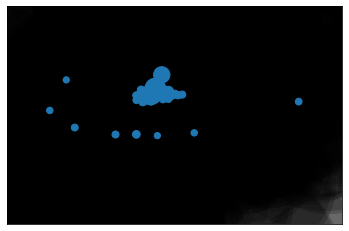

In [73]:
pos = nx.spring_layout(SP)
prMax = max(list(pr.values()))


nx.draw_networkx_edges(
        SP, pos, width=[10*d['weight']+1 for (u, v, d) in SP.edges(data=True)],
        alpha=0.2,
       );
    
    # nodes
nx.draw_networkx_nodes(
        SP,
        pos,
        nodelist=pr.keys(),
        node_size=[400*v/prMax+30 for v in pr.values()],
        zorder=30,
    )